# SVM Classification model for document class prediction

## Part 1 : data preparation

### 1.A. Extraction of top labels (in terms of frequency) and the associated label (the outputs)

In [38]:
import os
import re
import numpy as np
from sklearn import svm


sources_directory = "./CC/CC-src"

In [39]:
list_sources = os.listdir(sources_directory)

In [40]:
tex_files = []
class_per_source = []
sources_names = []
cpt = 0

for source in list_sources:
    sources_names.append(source)
    classes = []
    for file_name in os.listdir(sources_directory + "/" + source):
        if file_name.__contains__(".tex") and not file_name.__contains__(".bak"):
            tex_files.append(file_name)
            try:
                data = open(sources_directory + "/" + source + "/" + file_name).read()
                for doc_class in re.findall(r'documentclass(.*)}', data):
                    if not doc_class.__contains__('{'):
                        pass#print(doc_class) # One problematic case over all examples
                    else:
                        doc_class = doc_class.split('{', 1)[1]
                        doc_class = doc_class.split('}', 1)[0]
                        classes.append(doc_class)
            except UnicodeDecodeError as error:
                #print(error)
                pass # Some files can't be read ... 
            
    if len(classes) > 0:
        classes = classes[0]
        cpt = cpt+1
    
    else:
        classes = None 
        
    class_per_source.append(classes)
            
print(100 * (cpt / len(list_sources)))

94.27474253796474


In [41]:
#print(class_per_source)
print(len(class_per_source))

5729


In [42]:
#print(sources_names)
print(len(sources_names))

5729


In [43]:
from collections import Counter

classes = {x:class_per_source.count(x) for x in class_per_source}

size_of_trainable_sources = len(sources_names) - classes[None] - classes['article'] - 2

del classes[None]
del classes['article']

sorted_classes = sorted(classes, key=classes.get, reverse=True)

nb_classes = range(1, len(classes.keys()))
pct_covered_sources = []

for value in nb_classes:
    problem_classes = sorted_classes[:value]

    covered_sources_with_pb_classes = 0

    for pb_class in problem_classes: 
        covered_sources_with_pb_classes += classes[pb_class] / size_of_trainable_sources
        
    pct_covered_sources.append(100 * covered_sources_with_pb_classes)

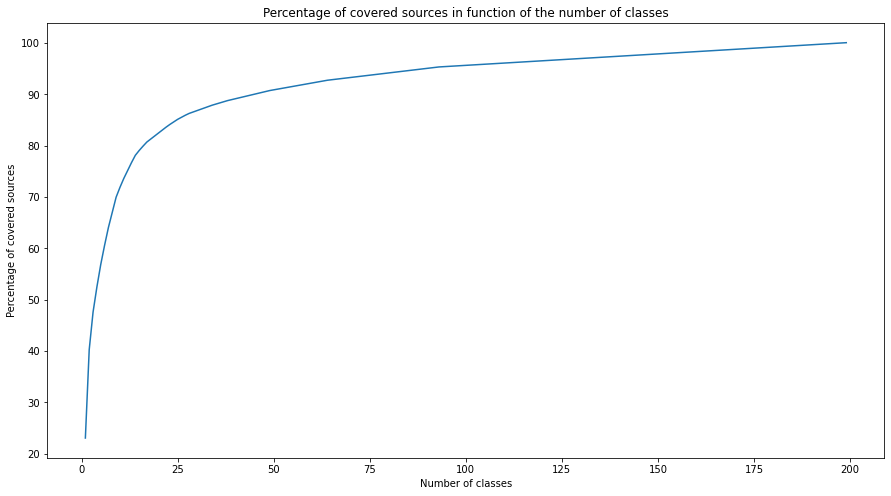

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(nb_classes, pct_covered_sources)
plt.xlabel("Number of classes")
plt.ylabel("Percentage of covered sources")
plt.title("Percentage of covered sources in function of the number of classes")
plt.show()

In [45]:
k = 15 # Number of classes in the model

problem_classes = sorted_classes[:k]

covered_sources_with_pb_classes = 0

for pb_class in problem_classes: 
    covered_sources_with_pb_classes += classes[pb_class] / size_of_trainable_sources
    
print("Percentage of covered sources with " + str(k) + " classes : " + str(100 * covered_sources_with_pb_classes))

Percentage of covered sources with 15 classes : 79.04592064199733


In [46]:
trainable_file_names = []
trainable_outputs = []

for index in range(0, len(sources_names) - 2): # - 2 since there are also two folders "compressed" and "tmp"
    if not(class_per_source[index] == None or class_per_source[index] == "article"):
        if class_per_source[index] in problem_classes:
            trainable_outputs.append(class_per_source[index])
            trainable_file_names.append(sources_names[index])

In [47]:
print(len(trainable_file_names))
print(trainable_file_names)

1773
['0904.3169', '0904.3273', '0905.1202', '0905.1215', '0905.3108', '0906.1489', '0906.2154', '0906.2812', '0906.3051', '0906.3119', '0906.3197', '0906.3199', '0906.3208', '0906.3213', '0906.3225', '0906.3227', '0906.3228', '0906.3231', '0906.3248', '0906.3251', '0906.3284', '0906.3306', '0906.3327', '0906.3329', '0906.3332', '0906.3765', '0906.4162', '0907.1579', '0907.2850', '0907.3117', '0907.3780', '0907.4488', '0907.4775', '0907.5130', '0907.5575', '0908.1599', '0908.2122', '0908.2782', '0908.3954', '0908.3981', '0908.4041', '0908.4494', '0909.1102', '0909.1594', '0909.2694', '0909.3005', '0909.3787', '0909.4766', '0909.5029', '0909.5038', '0909.5097', '0909.5099', '0909.5293', '0910.0582', '0910.1268', '0910.2058', '0910.2443', '0910.4224', '0910.4353', '0910.5107', '0910.5819', '0911.2280', '0911.2317', '0911.2322', '0911.2325', '0911.3438', '0911.3492', '0911.3674', '0911.3708', '0911.4322', '0912.0309', '0912.0746', '0912.1050', '0912.2607', '0912.2652', '0912.3134', '0912.

In [48]:
print(len(trainable_outputs))
print(trainable_outputs)

1773
['llncs', 'IEEEtran', 'llncs', 'IEEEtran', 'IEEEtran', 'llncs', 'LMCS', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'elsarticle', 'eptcs', 'revtex4', 'amsart', 'llncs', 'llncs', 'llncs', 'amsart', 'eptcs', 'llncs', 'revtex4', 'amsart', 'revtex4', 'amsart', 'revtex4', 'elsarticle', 'amsart', 'llncs', 'amsart', 'amsart', 'revtex4', 'llncs', 'revtex4', 'eptcs', 'eptcs', 'LMCS', 'llncs', 'llncs', 'llncs', 'LMCS', 'revtex4', 'amsart', 'amsart', 'IEEEtran', 'scrartcl', 'llncs', 'elsarticle', 'eptcs', 'eptcs', 'eptcs', 'revtex4', 'elsarticle', 'llncs', 'llncs', 'amsart', 'llncs', 'revtex4', 'llncs', 'llncs', 'amsart', 'llncs', 'llncs', 'llncs', 'amsart', 'revtex4', 'llncs', 'llncs', 'amsart', 'scrartcl', 'amsart', 'elsarticle', 'llncs', 'amsart', 'llncs', 'svjour3', 'llncs', 'elsarticle', 'IEEEtran', 'llncs', 'llncs', 'llncs', 'llncs', 'amsart', 'llncs', 'amsart', 'amsart

### 1.B. Extraction of features via PDFAlto (training set)

#### Features to be extracted : 

 1. The principal indent size (space between the very-left of the page and the beginning of the text in a regular paragraph. To do so, we must, among all the \<TextBlock\>, find the majoritarian "HPOS" value (but with this, we consider that, in the     paper, there will be more written explanations that mathematical formulas ...
   
 2. The main used font-type. We can either take all "STYLEREFS" and find the main associated "FONTFAMILY", or focus on all TextBlocks that have the majoritarian "HPOS", then look at their "STYLEREFS" and finally take the majoritarian associated "FONTFAMILY".
 
 3. The "main" font-size. By "main" font-size, I mean the font-size that is used in the regular TextBlocks, i.e. the ones that have the majoritarian "HPOS". Concretely, it corresponds to the paragraphs that only contain english text with explanations. 
 
 4. (and 5.) Similar features for the figure descriptions. It is most likely that a paper does contain figures, as we are not sure that it will contain theorems, lemms and so on (even though the selected papers should). So 2 new features : main used font-type and font-size (the HPOS is useless, since figure description are - almost - always centered, and their HPOS are therefore relative to the length of the description itself). 
 
 5. Similar features for the abstract, with HPOS.

In [244]:
training_set_size = 30
number_of_features = 3

In [235]:
# Features 1 to 3

import xml.etree.ElementTree as ET

training_set = np.full((training_set_size, number_of_features), None)

for index in range(0, training_set_size):
    file_name = "./pdfalto/xml_tests/" + trainable_file_names[index] + ".xml"
    
    tree = ET.parse(file_name)
    root = tree.getroot()

    positions_textblocks = []
    font_per_string = []

    for element in root.findall("./{http://www.loc.gov/standards/alto/ns-v3#}Layout/{http://www.loc.gov/standards/alto/ns-v3#}Page/{http://www.loc.gov/standards/alto/ns-v3#}PrintSpace/*"):
        if element.tag == '{http://www.loc.gov/standards/alto/ns-v3#}TextBlock':
            positions_textblocks.append(round(float(element.attrib['HPOS']), 1))

    occurences_positions_textblocks = {x:positions_textblocks.count(x) for x in positions_textblocks}
    majoritarian_hpos = sorted(occurences_positions_textblocks, key=occurences_positions_textblocks.get, reverse=True)[0]


    for element in root.findall("./{http://www.loc.gov/standards/alto/ns-v3#}Layout/{http://www.loc.gov/standards/alto/ns-v3#}Page/{http://www.loc.gov/standards/alto/ns-v3#}PrintSpace/{http://www.loc.gov/standards/alto/ns-v3#}TextBlock/{http://www.loc.gov/standards/alto/ns-v3#}TextLine/*"):
          if element.tag == "{http://www.loc.gov/standards/alto/ns-v3#}String":
                font_per_string.append(element.attrib['STYLEREFS'])

    occurences_font_per_string = {x:font_per_string.count(x) for x in font_per_string}
    majoritarian_font_per_string = sorted(occurences_font_per_string, key=occurences_font_per_string.get, reverse=True)[0]

    majoritarian_font_size = 0
    majoritarian_font_family = ""

    for element in root.findall("./{http://www.loc.gov/standards/alto/ns-v3#}Styles/*"):
        if element.attrib['ID'] == majoritarian_font_per_string:
            majoritarian_font_size = round(float(element.attrib['FONTSIZE']), 1)
            majoritarian_font_family = element.attrib['FONTFAMILY']
            
    training_set[index, 0] = majoritarian_hpos
    training_set[index, 1] = majoritarian_font_size
    training_set[index, 2] = majoritarian_font_family

In [257]:
distinct_fonts = []

for font in training_set[:, 2]:
    if not(font in distinct_fonts):
        distinct_fonts.append(font)

for index in range(0, training_set_size):
    for distinct_fonts_index in range(0, training_set_size):
        if distinct_fonts[distinct_fonts_index] == training_set[index, 2]:
            training_set[index, 2] = distinct_fonts_index
            break
            
outputs = np.array(trainable_outputs[0:training_set_size])


distinct_outputs = []

for output in outputs:
    if not(output in distinct_outputs):
        distinct_outputs.append(output)
        
for index in range(0, training_set_size):
    for distinct_outputs_index in range(0, training_set_size):
        if distinct_outputs[distinct_outputs_index] == outputs[index]:
            outputs[index] = distinct_outputs_index
            break

In [258]:
print(training_set)
print(outputs)

[[90.0 10.0 0]
 [49.0 10.0 1]
 [134.8 10.0 2]
 [312.0 10.0 1]
 [54.0 10.0 2]
 [134.8 10.0 0]
 [90.0 10.9 0]
 [134.8 10.0 0]
 [79.2 10.9 2]
 [79.2 10.9 2]
 [79.2 10.9 2]
 [79.2 10.9 2]
 [79.2 10.9 2]
 [79.2 10.9 2]
 [79.2 10.9 2]
 [79.2 10.9 1]
 [79.2 10.9 2]
 [79.2 10.9 2]
 [79.2 10.9 2]
 [79.2 10.9 2]
 [79.2 10.9 1]
 [79.2 10.9 2]
 [79.2 10.9 1]
 [79.2 10.9 1]
 [79.2 10.9 1]
 [110.9 12.0 3]
 [79.2 10.9 2]
 [64.8 10.0 0]
 [72.0 10.9 0]
 [134.8 10.0 0]]
['0' '1' '0' '1' '1' '0' '2' '0' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '4' '3' '5' '6' '0']


## Part 2 : model training

We will use an SVM model from scikitlearn to try a first learning phase.

In [265]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(training_set, outputs)

print(model.predict(training_set))
print(outputs)
print(model.score(training_set, outputs))

['0' '1' '0' '1' '1' '0' '3' '0' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '4' '3' '0' '3' '0']
['0' '1' '0' '1' '1' '0' '2' '0' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '4' '3' '5' '6' '0']
0.9
